In [2]:
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
DOGS_CAT_DIR = "./dogs-cats-mini"

filenames = os.listdir(DOGS_CAT_DIR)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df.head()

,filename,category
0,dog.4408.jpg,1
1,dog.2268.jpg,1
2,dog.2723.jpg,1
3,cat.1583.jpg,0
4,dog.3594.jpg,1


<Axes: xlabel='category'>

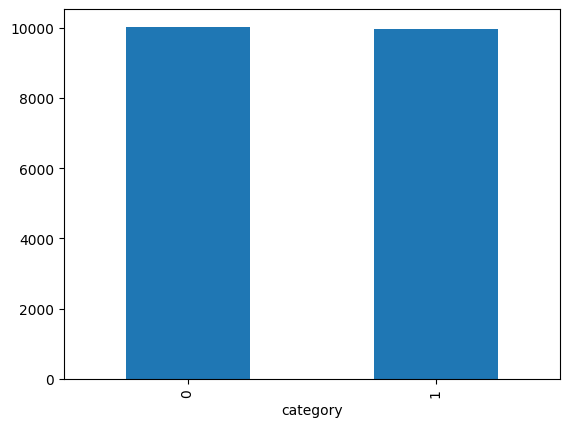

In [3]:
df['category'].value_counts().plot.bar()

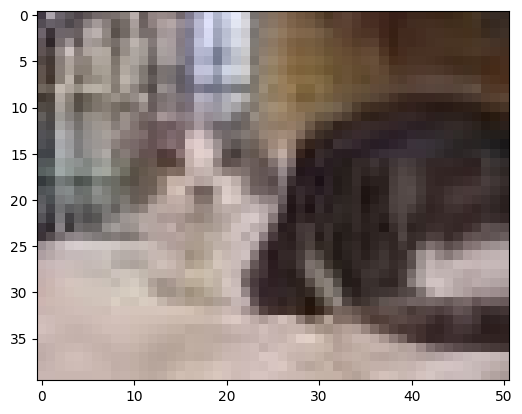

In [4]:
sample = random.choice(filenames)
image = load_img(DOGS_CAT_DIR+"/"+sample)
plt.imshow(image)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, SeparableConv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Block 1
# Changed to SeparableConv2D for speed
model.add(SeparableConv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2)) # Reduced dropout slightly for earlier layers

# Block 2
model.add(SeparableConv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 3
model.add(SeparableConv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 4 (Added for deeper feature extraction without heavy cost)
model.add(SeparableConv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# CRITICAL CHANGE: GlobalAveragePooling2D replaces Flatten
model.add(GlobalAveragePooling2D())

# Head
model.add(Dense(128, activation='relu')) # Reduced from 512
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output
model.add(Dense(2, activation='softmax'))

# Optimizer changed to Adam
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/home/oskar/university_projects/inteligencja_obliczeniowa/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_separable_conv.py:104: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
E0000 00:00:1763498667.930777   65562 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1763498667.938163   65562 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ separable_conv2d                │ (None, 126, 126, 32)   │           155 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_1              │ (None, 61, 61, 64)     │         2,400 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_2              │ (None, 28, 28, 128)    │         8,896 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_3              │ (None, 12, 12, 256)    │        34,176 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             

 Total params: 81,213 (317.24 KB)

 Trainable params: 79,997 (312.49 KB)

 Non-trainable params: 1,216 (4.75 KB)

<Axes: xlabel='category'>

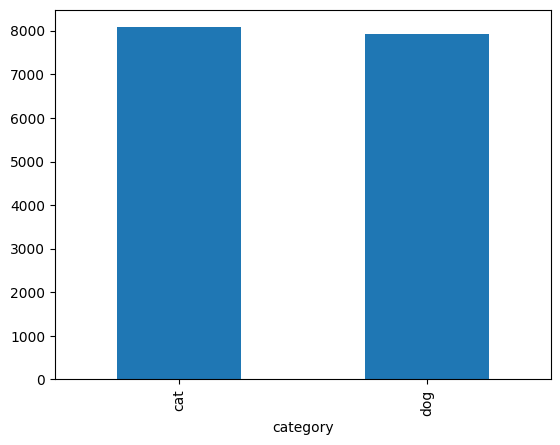

In [6]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001,
                                            mode='max')

callbacks = [earlystop, learning_rate_reduction]

df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
train_df['category'].value_counts().plot.bar()

<Axes: xlabel='category'>

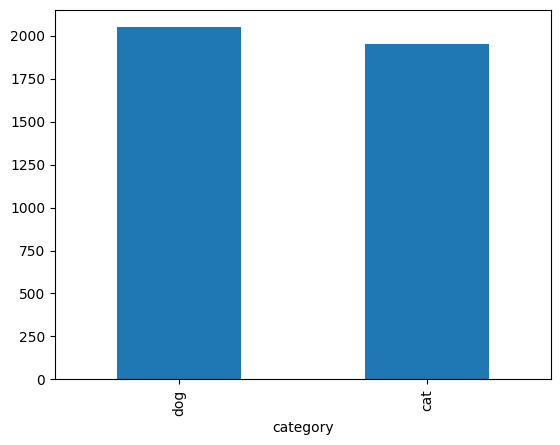

In [7]:
validate_df['category'].value_counts().plot.bar()

In [8]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    DOGS_CAT_DIR + "/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 16000 validated image filenames belonging to 2 classes.


In [9]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    DOGS_CAT_DIR + "/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 4000 validated image filenames belonging to 2 classes.


In [10]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    DOGS_CAT_DIR + "/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


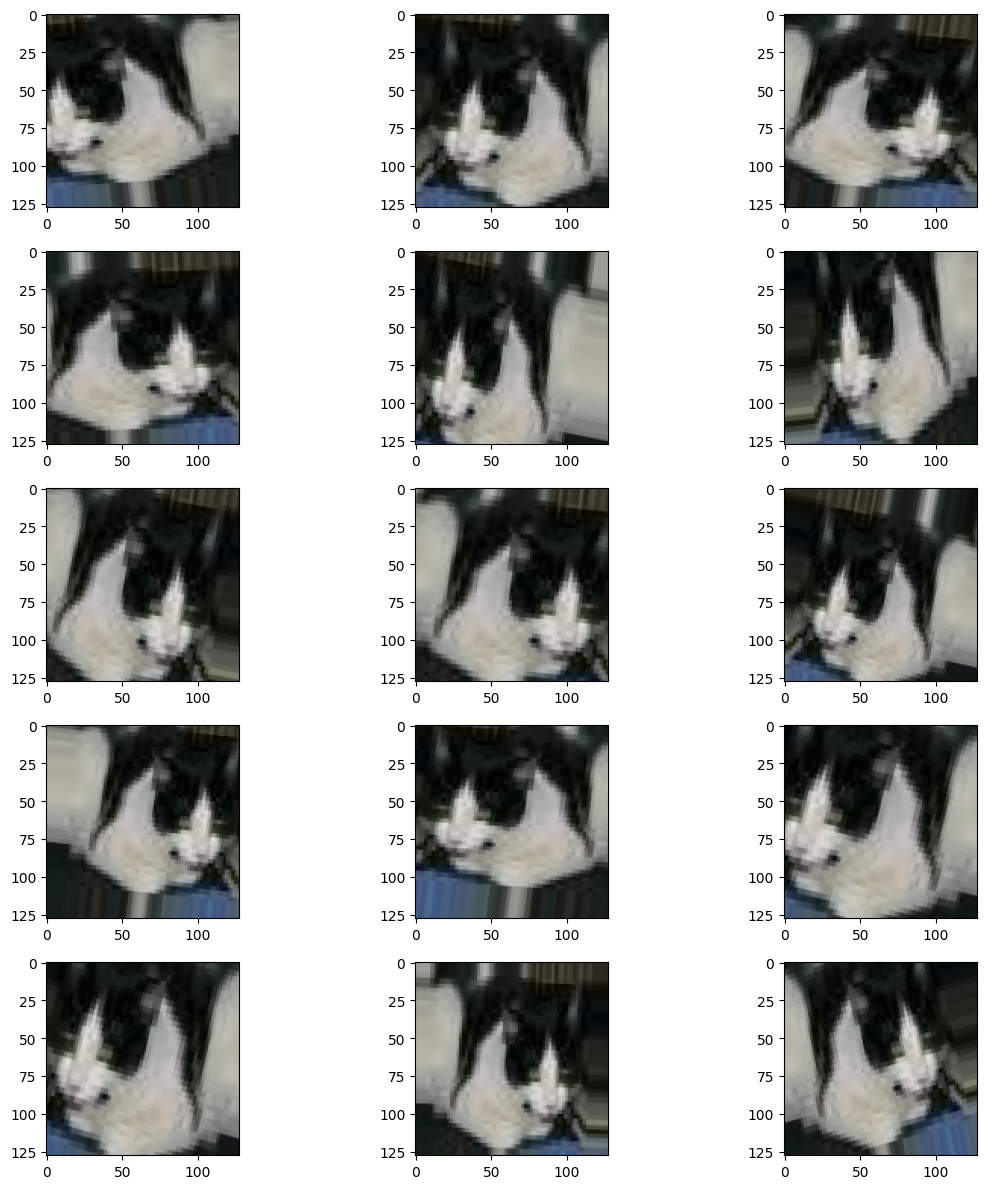

In [11]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [12]:

epochs=30
steps_per_epoch = int(np.ceil(total_train / batch_size))
validation_steps = int(np.ceil(total_validate / batch_size))
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    steps_per_epoch=steps_per_epoch,
    callbacks=callbacks
)

Epoch 1/30
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 64s 55ms/step - accuracy: 0.5719 - loss: 0.7685 - val_accuracy: 0.5450 - val_loss: 0.8269 - learning_rate: 0.0010
Epoch 2/30
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 64s 60ms/step - accuracy: 0.6271 - loss: 0.6455 - val_accuracy: 0.6775 - val_loss: 0.6086 - learning_rate: 0.0010
Epoch 3/30
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 65s 61ms/step - accuracy: 0.6520 - loss: 0.6263 - val_accuracy: 0.5717 - val_loss: 0.7613 - learning_rate: 0.0010
Epoch 4/30
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6856 - loss: 0.5958
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 60s 57ms/step - accuracy: 0.6840 - loss: 0.5963 - val_accuracy: 0.6658 - val_loss: 0.6815 - learning_rate: 0.0010
Epoch 5/30
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 62s 58ms/step - accuracy: 0.7142 - loss: 0.5577 - val_accuracy: 0.7300 - val_loss: 0.5399 - learning_rate: 5.0000e-04
Epoch 6/30
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 66s 62ms/step - accu

In [13]:
model.save_weights("model_v2.weights.h5")

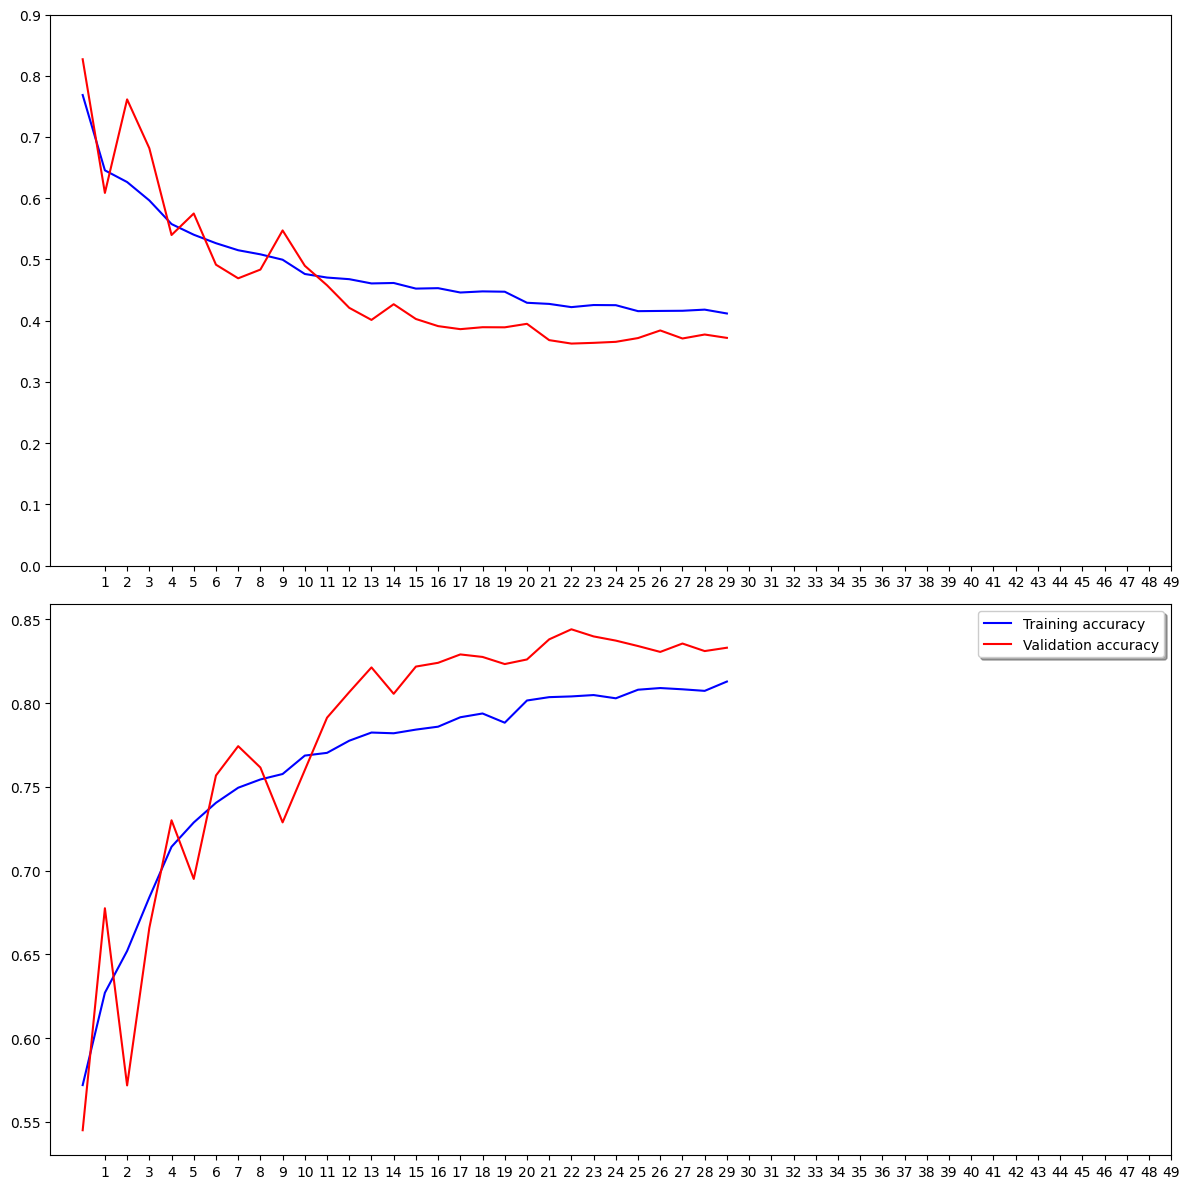

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 50, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 50, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
# import os
# import shutil
# import random

# # --- Configuration ---
# SOURCE_DIR = "dogs-cats-mini"  # Directory containing your images
# TEST_DIR = "test"    # Directory where 20% of images will be moved
# SPLIT_PERCENT = 0.20 # 20% for the test set (0.20)

# def split_data(source_dir, test_dir, split_percent):
#     """
#     Splits images from the source directory and moves a percentage 
#     of them to the test directory.
#     """
#     print(f"Starting split for directory: {source_dir}")

#     # 1. Get all image file names
#     # Filter for common image extensions (case-insensitive)
#     all_files = [f for f in os.listdir(source_dir) 
#                  if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]
    
#     # Check if there are any files
#     if not all_files:
#         print(f"❌ No image files found in '{source_dir}'.")
#         return

#     total_files = len(all_files)
    
#     # 2. Calculate the number of files to move
#     num_test_files = int(total_files * split_percent)
#     print(f"Total images found: {total_files}")
#     print(f"Moving {num_test_files} images ({split_percent*100:.0f}%) to the test set.")

#     # 3. Select files randomly for the test set
    # test_files = random.sample(all_files, num_test_files)
    
#     # 4. Create the test directory if it doesn't exist
#     os.makedirs(test_dir, exist_ok=True)
#     print(f"Created/ensured directory: {test_dir}")

#     # 5. Move the selected files
#     for filename in test_files:
#         src_path = os.path.join(source_dir, filename)
#         dst_path = os.path.join(test_dir, filename)
        
#         # Use shutil.move to move the file
#         try:
#             shutil.move(src_path, dst_path)
#             # print(f"Moved: {filename}") # Uncomment for verbose output
#         except Exception as e:
#             print(f"Error moving {filename}: {e}")
            
#     print("---")
#     print(f"✅ Splitting complete! {num_test_files} files moved to '{test_dir}'.")
#     print(f"Remaining files in '{source_dir}': {total_files - num_test_files}")

# # --- Execute the function ---
# if __name__ == "__main__":
#     # Initialize the random seed for reproducibility (optional)
#     random.seed(42) 
#     split_data(SOURCE_DIR, TEST_DIR, SPLIT_PERCENT)

Starting split for directory: dogs-cats-mini
Total images found: 25000
Moving 5000 images (20%) to the test set.
Created/ensured directory: test
---
✅ Splitting complete! 5000 files moved to 'test'.
Remaining files in 'dogs-cats-mini': 20000


In [17]:
test_filenames = os.listdir("./test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [18]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "./test", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 5000 validated image filenames.


In [19]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size).astype(int))

334/334 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


/tmp/ipykernel_65562/3767708931.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })


<Axes: xlabel='category'>

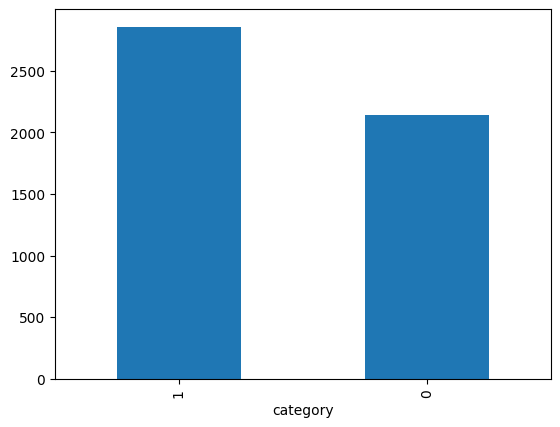

In [21]:
test_df['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })
test_df['category'].value_counts().plot.bar()

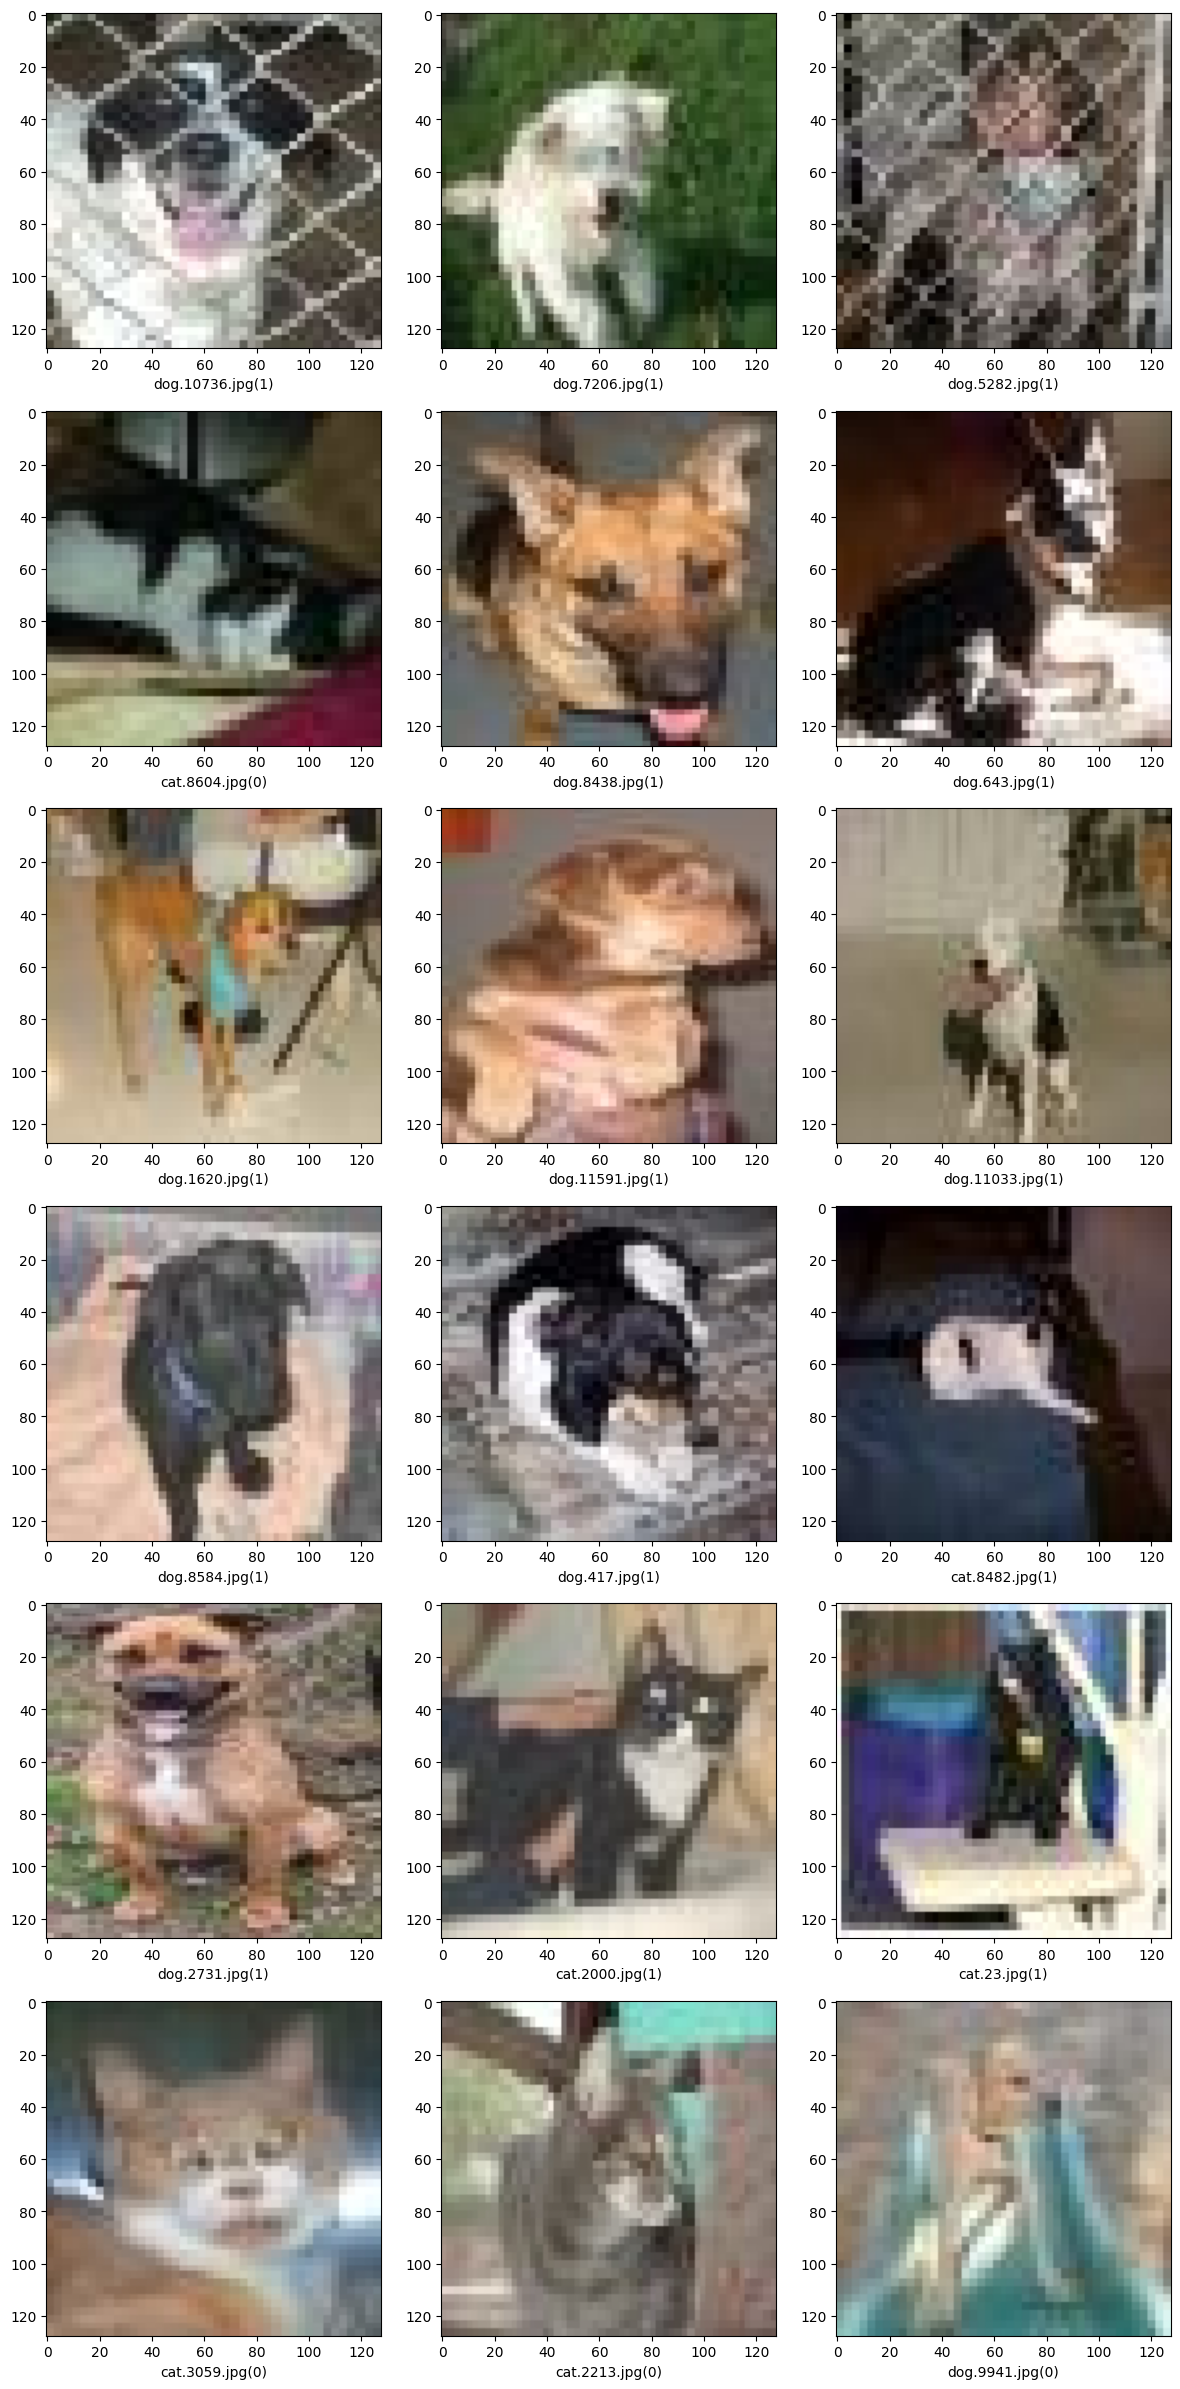

In [22]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [23]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Krok 1: Wyodrębnienie PRAWDZIWEJ etykiety ('cat' lub 'dog') z nazwy pliku
test_df['true_label'] = test_df['filename'].apply(
    lambda x: 'dog' if 'dog' in x else ('cat' if 'cat' in x else None)
)

# Krok 2: Konwersja PRAWDZIWEJ etykiety na postać numeryczną (0 lub 1), 
# aby pasowała do przewidzianych wyników
# Ustalenie mapowania: 'dog' -> 1, 'cat' -> 0
mapping = {'dog': 1, 'cat': 0}
test_df['true_numeric'] = test_df['true_label'].map(mapping)


# Krok 3: Ustawienie zmiennych
y_true = test_df['true_numeric']  # Prawdziwe etykiety (0 lub 1)
y_pred = test_df['category']      # Przewidziane etykiety (0 lub 1)

# Krok 4: Obliczenie Macierzy Błędu
labels = [0, 1]  # Etykiety: 0 (cat), 1 (dog)
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Konwersja do DataFrame dla lepszej wizualizacji
cm_df = pd.DataFrame(cm, index=['Prawda: CAT (0)', 'Prawda: DOG (1)'], columns=['Przewidziano: CAT (0)', 'Przewidziano: DOG (1)'])

print("Macierz Błędu (Confusion Matrix) dla 0 i 1:")
print(cm_df)

Macierz Błędu (Confusion Matrix) dla 0 i 1:
                 Przewidziano: CAT (0)  Przewidziano: DOG (1)
Prawda: CAT (0)                   1864                    606
Prawda: DOG (1)                    279                   2251
